In [73]:
import csv
from matplotlib import pyplot as plt
from collections import Counter
from urlparse import urlparse
import os
from os.path import join

In [2]:
ALEXA_LIST = "top-1m.csv"

# Histograms of Domain Name Lengths

In [28]:
def plot_histogram(domain_lengths, title):
    
    plt.hist(domain_lengths, bins=max(domain_lengths))
    plt.xlabel("Domain length")
    plt.ylabel("Count")
    if len(title) > 0:
        plt.title(title)
    plt.show()   

In [13]:
def remove_www_from_url(domains):
    new_domains = []
    for item in domains:
        if item[:4] == 'www.':
            new_domains.append(item[4:])
        else:
            new_domains.append(item)
    return new_domains

In [14]:
#Function to read domains and their from Alexa's list
def process_alexa_list(fname, remove_www = True):
    
    domains = []
    with open(fname) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            domains.append(row[1])
    if remove_www:
        domains = remove_www_from_url(domains)
    domain_lengths = [len(x) for x in domains]

    return domains, domain_lengths

In [17]:
alexa_domains, alexa_domain_lengths = process_alexa_list(ALEXA_LIST)

### Histogram of domain name lengths in Alexa list

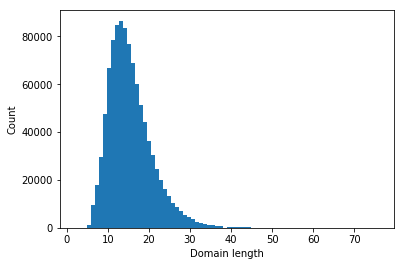

In [29]:
#Display histogram of domain lengths in Alexa list
plot_histogram(alexa_domain_lengths, "")

In [12]:
COUNTRY_DIR = "country_lists"

In [70]:
def censor_list(fname, remove_www = True):

    domains = []
    with open(fname) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        next(csv_reader, None)
        for row in csv_reader:
            base_url = urlparse(row[0]).netloc
            domains.append(base_url)
            #domains.append(row[0].split('/')[2])
    if remove_www:
        domains = remove_www_from_url(domains)
    domains = list(set(domains))
    domain_lengths = [len(x) for x in domains]

    return domains, domain_lengths

In [71]:
country_files = os.listdir(COUNTRY_DIR)
country_dict = {'tm.csv' : "Turkmenistan", "ir.csv" : "Iran", "er.csv" : "Eritrea", 
                "sa.csv" : "Saudi Arabia", "vn.csv" : "Vietnam", "cn.csv" : "China"}

### Histograms of domain name lengths in country censor lists

We remove www from the URL (and do the same in Alexa domains since we want to compare the lists). The Alexa list only contains domains, whereas Saudi Arabia's list contains entries with full paths. Currently, taking only domains from the censored lists.

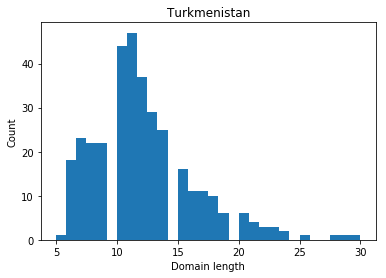

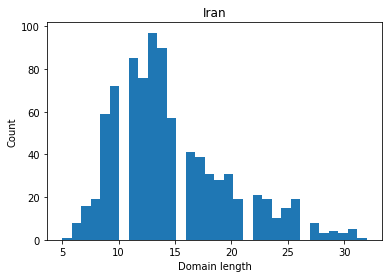

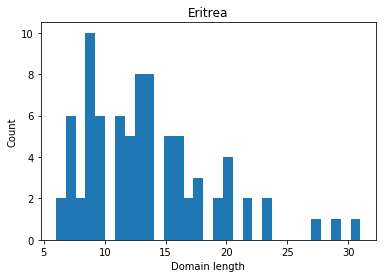

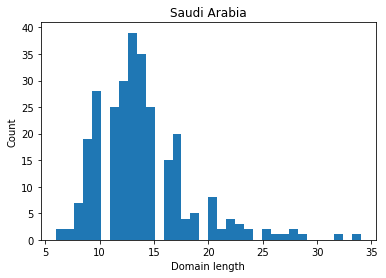

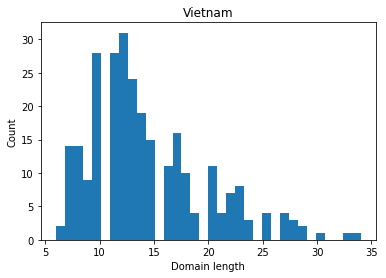

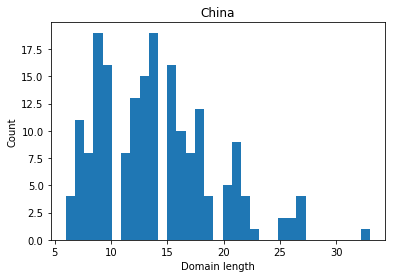

In [75]:
#Display histogram of domain lengths for country censor lists
for country in country_files:
    country_fname = join(COUNTRY_DIR, country)
    country_domains, country_domain_lengths = censor_list(country_fname)
    plot_histogram(country_domain_lengths, country_dict[country])

In [34]:
alexa_domain_dict = {}
for i in range(0, len(alexa_domains)):
    if alexa_domain_lengths[i] not in alexa_domain_dict:
        alexa_domain_dict[alexa_domain_lengths[i]] = []
    alexa_domain_dict[alexa_domain_lengths[i]].append(alexa_domains[i])

In [76]:
def check_censored_in_alexa(alexa_domain_dict, censored_domains, country_name):

    anonymity_set_size_list = []

    for cd in censored_domains:
        cd_length = len(cd)
        anonymity_set_size = len(alexa_domain_dict[cd_length])
        anonymity_set_size_list.append(anonymity_set_size)

    print "Anonymity set size stats for", country_name, ":"
    print "Min:", min(anonymity_set_size_list)
    print "Max:", max(anonymity_set_size_list)

# Anonymity set stats

We look at domain lengths in the censored list, and find how many domains in the Alexa list have the same length. We report the minimum and maximum anonmity set sizes we observe.

In [81]:
for country in country_files:
    country_fname = join(COUNTRY_DIR, country)
    country_domains, country_domain_lengths = censor_list(country_fname)
    check_censored_in_alexa(alexa_domain_dict, country_domains, country_dict[country])

Anonymity set size stats for Turkmenistan :
Min: 1318
Max: 86597
Anonymity set size stats for Iran :
Min: 1318
Max: 86597
Anonymity set size stats for Eritrea :
Min: 3552
Max: 86597
Anonymity set size stats for Saudi Arabia :
Min: 1603
Max: 86597
Anonymity set size stats for Vietnam :
Min: 1603
Max: 86597
Anonymity set size stats for China :
Min: 2171
Max: 86597


# Ranking stats

We look at each domain in the censored list and find their ranking in the Alexa list. A rank of -1 is assigned if a domain is not in the Alexa list.

In [78]:
def find_ranking_in_alexa(country_domains, alexa_domains, country_name):
    
    print "Stats for", country_name, ":"
    ranking_list = []
    for cd in country_domains:
        if cd in alexa_domains:
            ranking_list.append(alexa_domains.index(cd) + 1)
        else:
            ranking_list.append(-1)
    return ranking_list

In [79]:
country_list = [country_dict[x] for x in country_files]

Total number of domains in each censor list and number of those domains found in Alexa list.

In [80]:
all_ranking_data = []
for country in country_files:
    country_fname = join(COUNTRY_DIR, country)
    country_domains, country_domain_lengths = censor_list(country_fname)
    ranking_list = find_ranking_in_alexa(country_domains, alexa_domains, country_dict[country])
    not_found = Counter(ranking_list)[-1]
    all_ranking_data.append(ranking_list)
    print "Total number of domains:", len(country_domains)
    print "Number of domains not found in Alexa list:", not_found

Stats for Turkmenistan :
Total number of domains: 344
Number of domains not found in Alexa list: 246
Stats for Iran :
Total number of domains: 877
Number of domains not found in Alexa list: 600
Stats for Eritrea :
Total number of domains: 81
Number of domains not found in Alexa list: 43
Stats for Saudi Arabia :
Total number of domains: 284
Number of domains not found in Alexa list: 219
Stats for Vietnam :
Total number of domains: 274
Number of domains not found in Alexa list: 218
Stats for China :
Total number of domains: 191
Number of domains not found in Alexa list: 94


### Boxplot of ranking per country -- including sites not found (rank = -1)

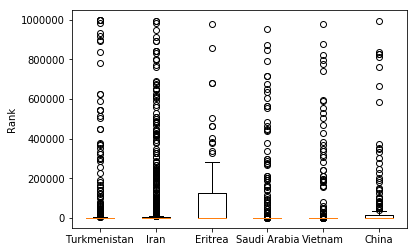

In [68]:
#Display all ranking (including not found -- not found is set to -1)
plt.boxplot(all_ranking_data)
plt.ylabel("Rank")
plt.xticks(range(1, 7), country_list)
plt.show()

### Boxplot of ranking per country --removing sites not found (rank = -1)

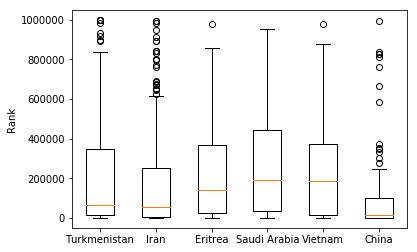

In [67]:
#Display ranking with not found domains removed
all_ranking_data_found = []
for rd in all_ranking_data:
    rd_found = [x for x in rd if x != -1]
    all_ranking_data_found.append(rd_found)
plt.boxplot(all_ranking_data_found)
plt.ylabel("Rank")
plt.xticks(range(1, 7), country_list)
plt.show()